# Life cylcle of a data science project 
### - data exploration or data preprocessing 
### - data Feature Engeneering 
### - Feature selection 
### - Model Building 
### -  Model Deployement 

# Machine Learning Pipeline 
#### we can create the different life cycle of the data science project in different file and then we can link each files 

In [1]:
# importing the ncessary library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
# ignoring the uncessesary warnings 

import warnings as wrn 
wrn.filterwarnings('ignore')

In [4]:
# getting the data set 

dataset = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None )
dataset.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# what we need to do in data analysis 
#### 1. Missing Values 
#### 2. All the numeric variable ( discrete vars and continuous vars )
#### 3. Distribution of the numerical features ( if it is skewed then we need to do some kind of transformation )
#### 4. all the categorical variable 
#### 5. cardianilty of categorical variable 
#### 6. Outliers detection 
#### 7. relationship between independent and dependedent variable 

# Nan 

In [30]:
# getting the variables that contains nan va
feature_with_nan = dataset.isna().sum()[dataset.isna().sum()>0].keys()

dataset[feature_with_nan].isna().mean().round(4)*100

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

## as we can see that we have so many nan values in the given data set , so we need to analyse what is the relationship between missing features and output variable( SalePrice) 

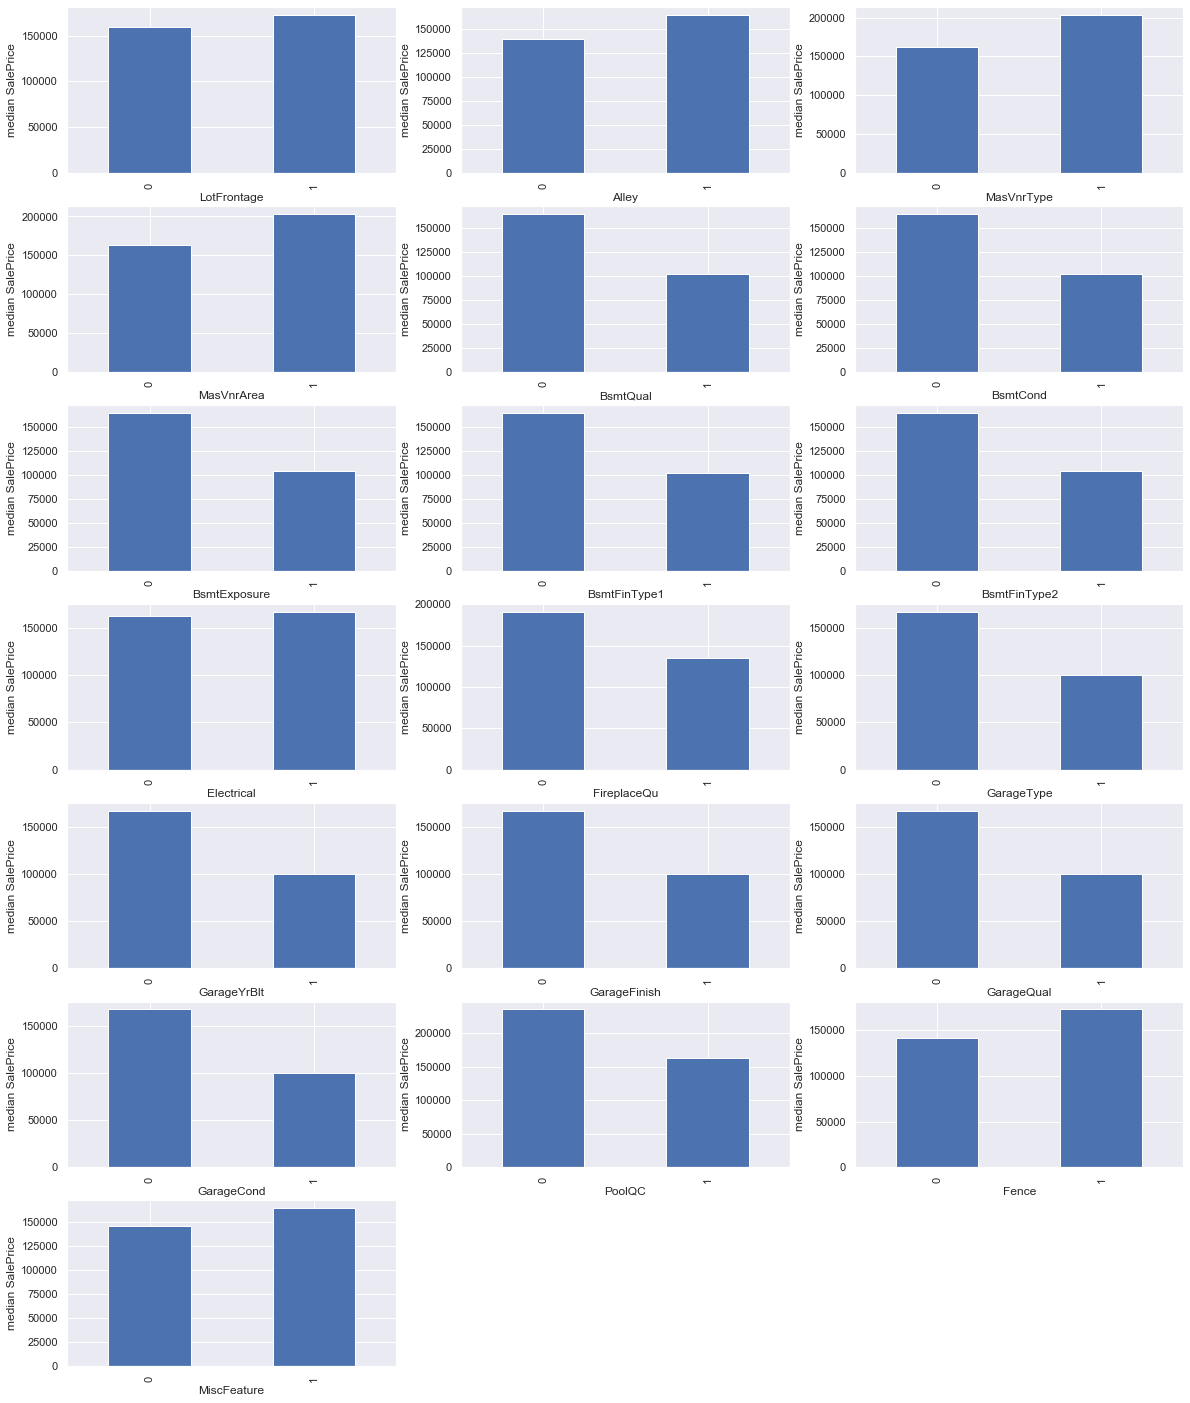

In [31]:

sns.set()
plt.figure(figsize=(20, 25))
for i, feature in enumerate(feature_with_nan):
    
    data = dataset.copy()
    
    # for better understanding that whether the nan is affecting the sale price or not we will replace nan with 1 and non nan with 0
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # it will plot the median salary for nan and non-nan values in particular feature 
    plt.subplot(7, 3, i+1)
    data.groupby(feature)['SalePrice'].median().plot.bar()   # we took median bcz the data is skewed
    plt.ylabel('median SalePrice')


#### we can see in the above graph that in some of the features where nan is present ,  the sale price is higher ( lotrfrontage, alley, masvnrtype, masvnrarea, fence, MiscFeature
#### hence these should not be directly delete becuase it is playing a major role in sale price, we will replace the values with something meaning full values 
#### we will do this in feature engeneering part 

# Numerical Features 

In [32]:
numeric_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Numeric Features : ', len(numeric_feature))

data[numeric_feature].head()

Numeric Features :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Tempral Variable : eg( date time )

#### in this particular data set we have 4 temporal variables 
#### temporal variables are important to understand because the upcoming data points will be dependent upon the previous features

In [33]:
year_feature = [feature for feature in data.columns if 'yr' in feature or 'Yr'
            in feature or 'Yr' in feature or 'year' in feature or 'Year' in feature ]

print('no. of temporal variables : ', len(year_feature))

year_feature 

no. of temporal variables :  4


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### let's see the behaviour of sale price with respect to yr features  

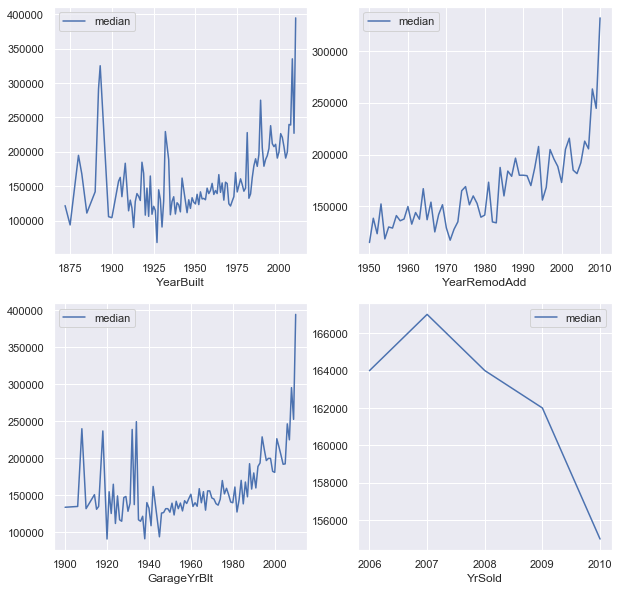

In [38]:
# we are going to have line plot to se the behaviour of year features with the sale price 

plt.figure(figsize=(10,10))
for i, feature in enumerate(year_feature):
    
    data = dataset.copy()  
    
    # getting the aggregate data for each kind of year features
    plt.subplot(2,2,i+1)
    
    data.groupby(feature)['SalePrice'].median().plot(label = 'median')
    plt.legend()
    
    

##### 1. price increases as the yearbuilt increases ( it mean newerr the home, higher the price )
##### 2. sale price also increases as the year of remodification increases 
##### 3. sale price also increases as the year of GarageYrbuilt increases increases hence newer the garage , higher the price 
##### 4. the price of the houses decreases as year of buying increases 

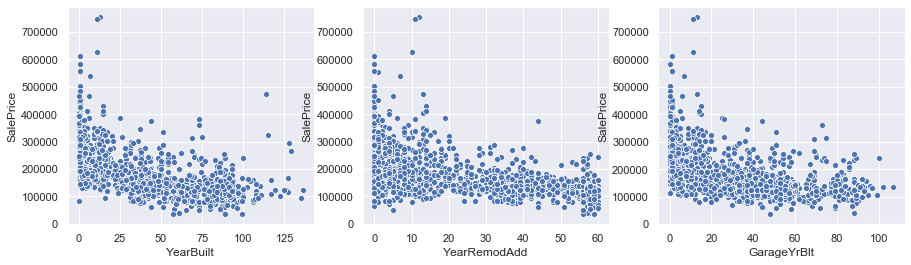

In [46]:
# let's see the behaviour of sale price with the difference of yrsold and year fetures 


plt.figure(figsize=(15,4))
for i, feature in enumerate(year_feature):
    
    data = dataset.copy() 
    
    if feature != 'YrSold':
    
        data[feature] = abs(data[feature] - data['YrSold'])

        # getting the aggregate data for each kind of year features
        plt.subplot(1,3,i+1)

        sns.scatterplot(data[feature], data['SalePrice'])


##### 1. we can see that , as the difference between yrsold and yearbuilt increases , sale price dicreses ( older the home, lower the price )
##### 2. same fot remodification and garageyr built 
##### it means older the garage , remodificatiooon, built year -----> lower the price 

# decrete and continuous vaariable  

In [53]:
# decrete variable are those varaibles which can be count 
# continuous variable are those which can not be count 

descrete_feature = [feature for feature in numeric_feature
                    if len(dataset[feature].unique()) < 30 and feature not in year_feature + ['Id']]
# year is continuoes feature 

print('there are {} features in the dataset which are decrete'.format(len(descrete_feature)))
descrete_feature

there are 17 features in the dataset which are decrete


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [61]:
dataset.groupby('PoolArea')[['SalePrice']].median()

,SalePrice
PoolArea,
0,162900
480,160000
512,235000
519,250000
555,745000
576,171000
648,181000
738,274970


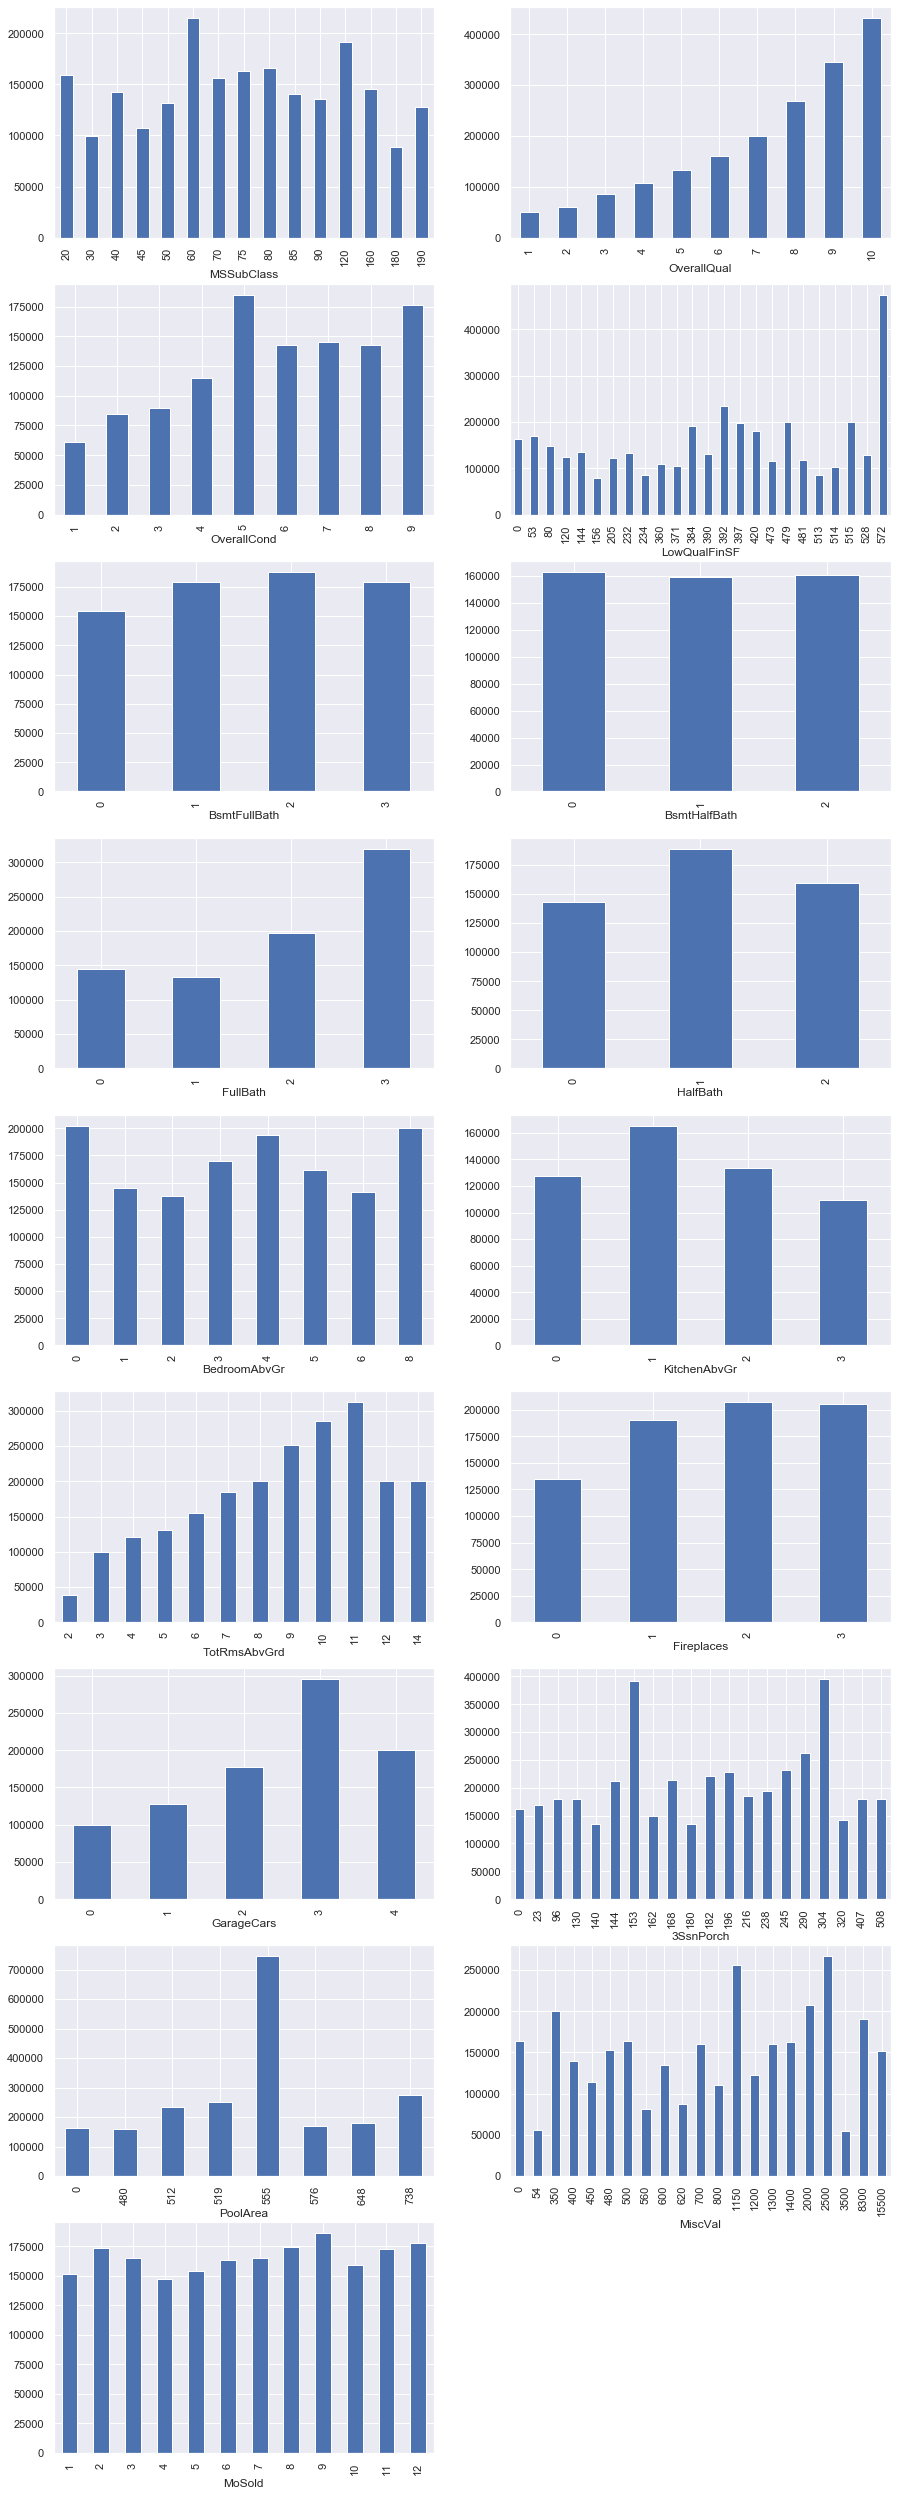

In [73]:
# let's see the behaviour of descrete features with the sale price 


plt.figure(figsize=(15,45))
for i, feature in enumerate(descrete_feature):
    
    data = dataset.copy() 
    
    plt.subplot(9,2,i+1)
    data.groupby(feature)['SalePrice'].median().plot(kind = 'bar', )

##### there is a clear relation between sales price and descrete features of the data set 

#### conntinuous varisbles 

In [75]:
continuous_feature = [feature for feature in numeric_feature if feature not in descrete_feature + ['Id'] + year_feature]

print('there are {} continuos feature in the data set '.format(len(continuous_feature)))

continuous_feature

there are 16 continuos feature in the data set 


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

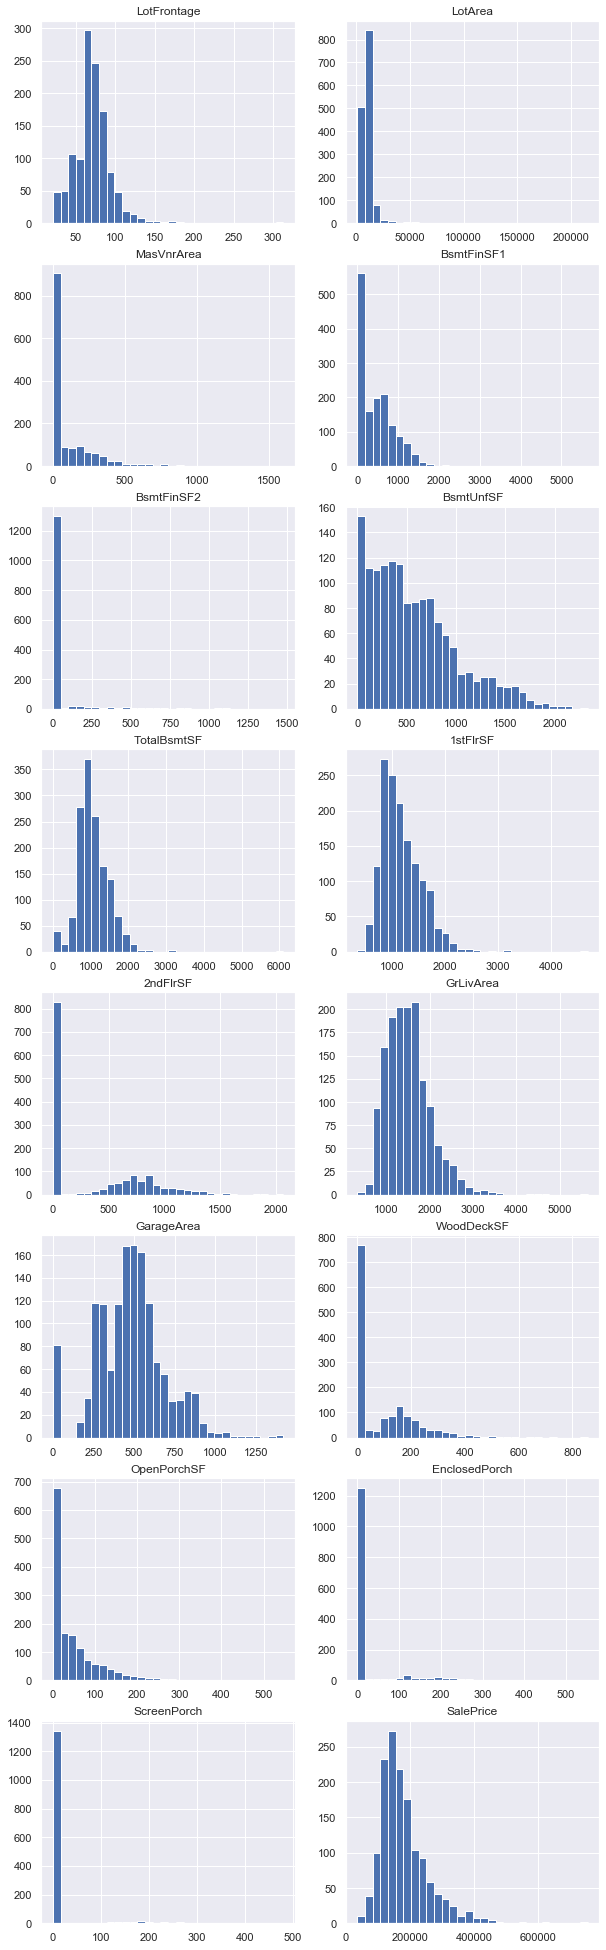

In [81]:
# analysing the continuous variables 

plt.figure(figsize=(10,35))
for i, feature in enumerate(continuous_feature):
    
    plt.subplot(8,2,i+1)
    
    plt.hist(data[feature], bins = 30)
    plt.title(feature)

#### most of the continuos variable is not having gaussian distribution , it means the data is skwed  
#### it's very important to transform the non - gaussian distribution feature into gaussian distribution for the better performance 
#### we will use log normal distribution 

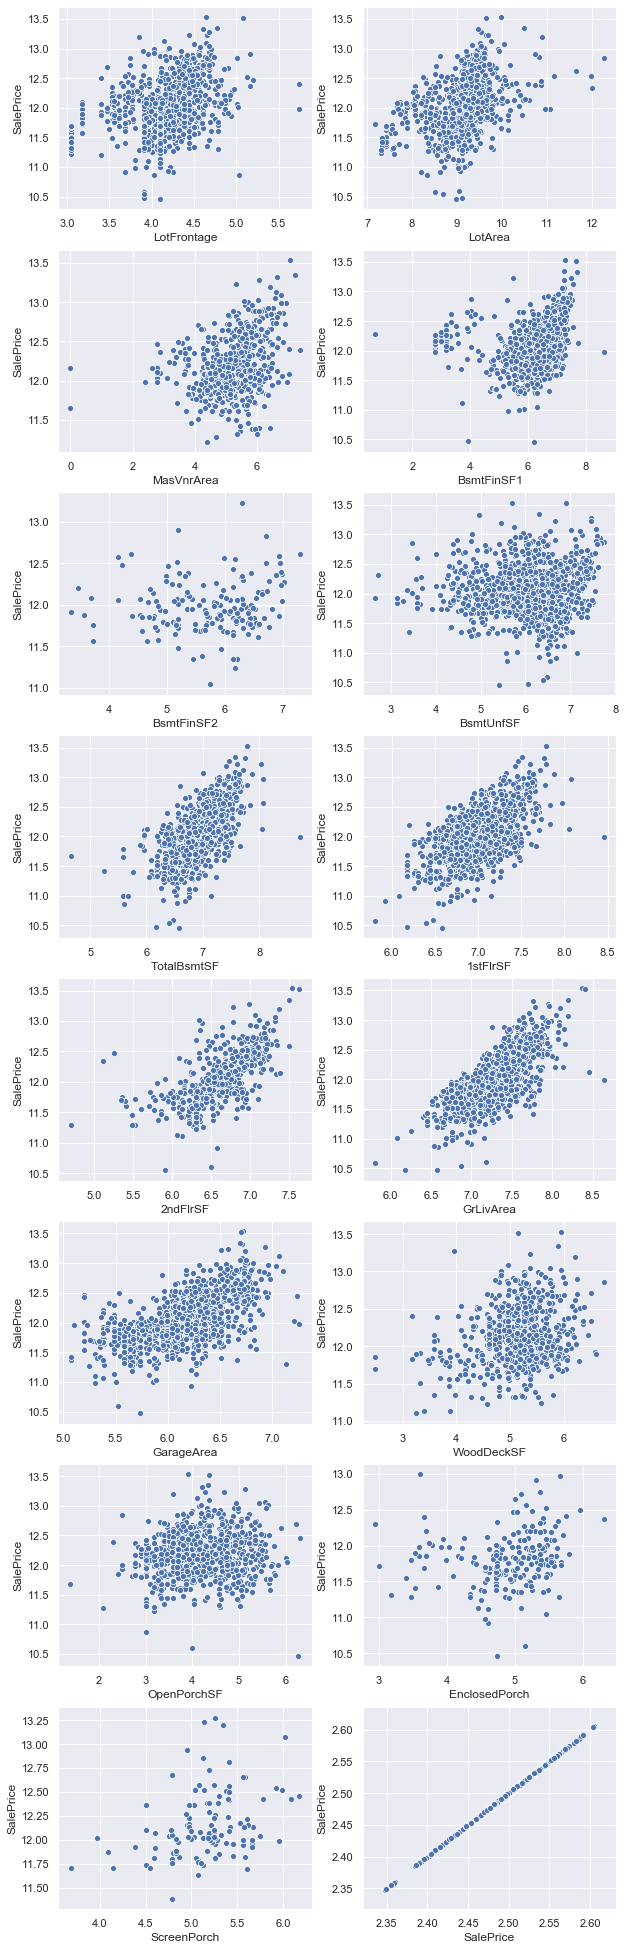

In [87]:
# we are going to apply log normal distribution for each continuous feature 

plt.figure(figsize=(10,35))

for i, feature in enumerate(continuous_feature):
    
    data = dataset.copy()
    
    plt.subplot(8,2,i+1)
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice']) 
    
    sns.scatterplot(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

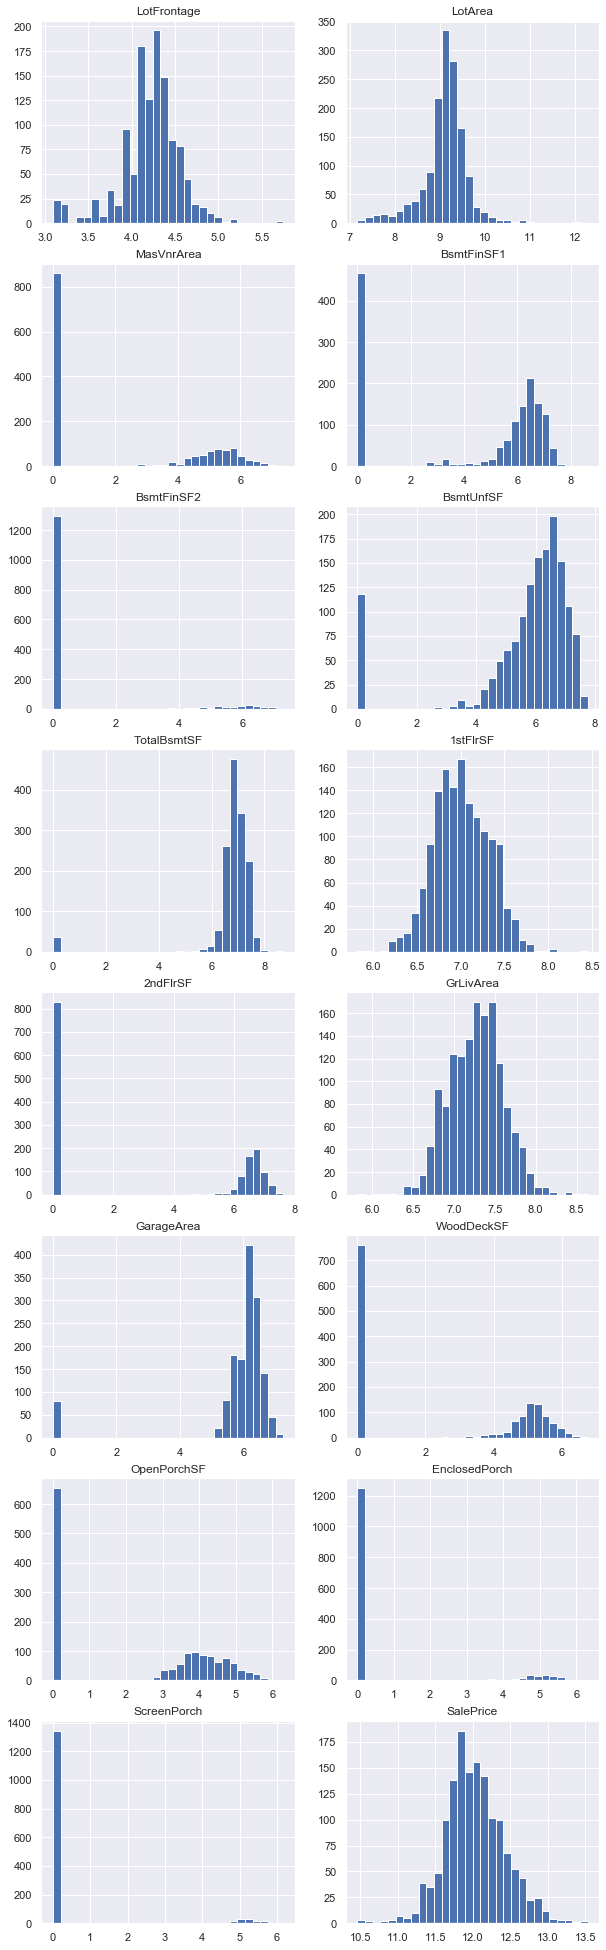

In [94]:
from scipy.stats import norm 
plt.figure(figsize=(10,35))

for i, feature in enumerate(continuous_feature):
    
    data = dataset.copy()

    
    plt.subplot(8,2,i+1)
    data[feature] = np.log1p(data[feature]) 

    plt.hist(data[feature], bins = 30)
    plt.title(feature)

# outliers detection 
#### the common way to detect the outlier is using box plot 
#### boxplot is always use with the continuos variable 

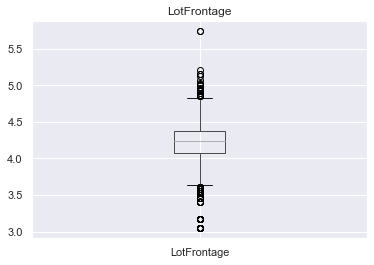

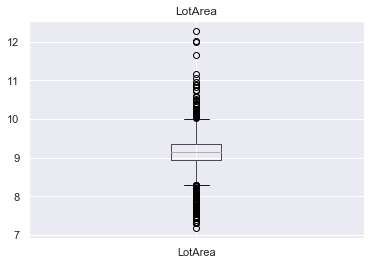

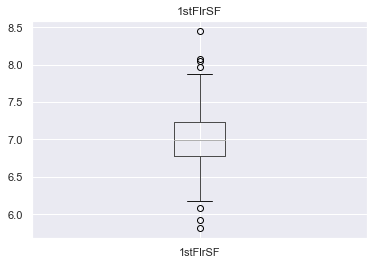

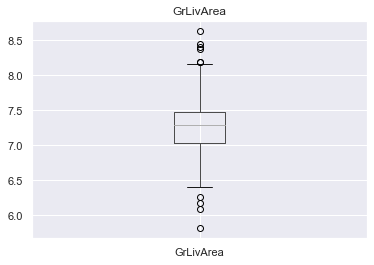

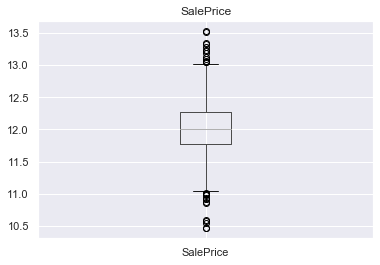

In [107]:
sns.set('notebook')
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.title(feature)
        plt.show()

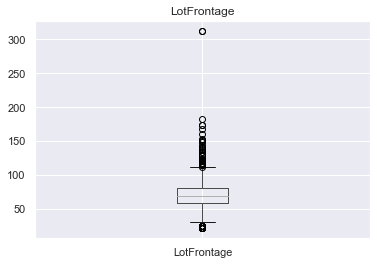

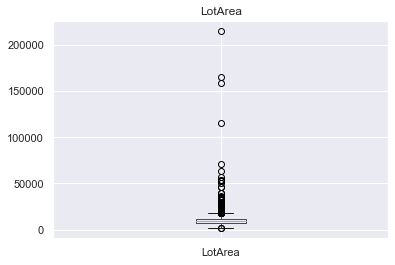

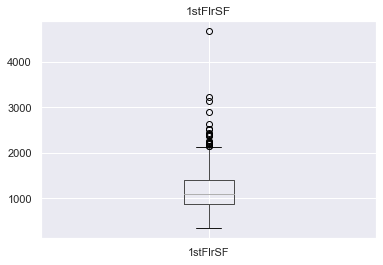

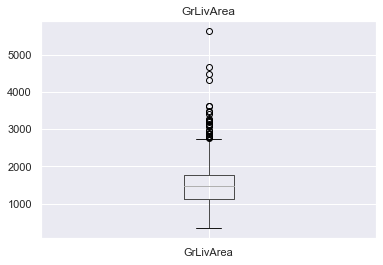

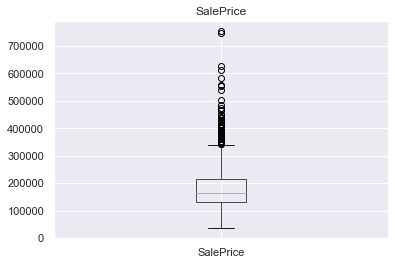

In [108]:
# without log transfprmation 

sns.set('notebook')
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:

        data.boxplot(column = feature)
        plt.title(feature)
        plt.show()

#### there are a lot of outliers and need to be fix  

# Categorical features  

In [112]:
categorical_feature = dataset.select_dtypes('O').columns 

print('there are {} categorical features'.format(len(categorical_feature)))
categorical_feature

there are 43 categorical features


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### the first step toward categourcal feature exploration is finding the cardinal value ( how many classes do we have in each feature ) 

In [114]:
for feature in categorical_feature:
    
    print(feature, len(dataset[feature].unique()), 'labels ')

MSZoning 5 labels 
Street 2 labels 
Alley 3 labels 
LotShape 4 labels 
LandContour 4 labels 
Utilities 2 labels 
LotConfig 5 labels 
LandSlope 3 labels 
Neighborhood 25 labels 
Condition1 9 labels 
Condition2 8 labels 
BldgType 5 labels 
HouseStyle 8 labels 
RoofStyle 6 labels 
RoofMatl 8 labels 
Exterior1st 15 labels 
Exterior2nd 16 labels 
MasVnrType 5 labels 
ExterQual 4 labels 
ExterCond 5 labels 
Foundation 6 labels 
BsmtQual 5 labels 
BsmtCond 5 labels 
BsmtExposure 5 labels 
BsmtFinType1 7 labels 
BsmtFinType2 7 labels 
Heating 6 labels 
HeatingQC 5 labels 
CentralAir 2 labels 
Electrical 6 labels 
KitchenQual 4 labels 
Functional 7 labels 
FireplaceQu 6 labels 
GarageType 7 labels 
GarageFinish 4 labels 
GarageQual 6 labels 
GarageCond 6 labels 
PavedDrive 3 labels 
PoolQC 4 labels 
Fence 5 labels 
MiscFeature 5 labels 
SaleType 9 labels 
SaleCondition 6 labels 


#### here,  Neighborhood , Exterior1st , Exterior1st  should be handled , because while performing onehotencoding it will create so many features which might rise to overfitting of the data points

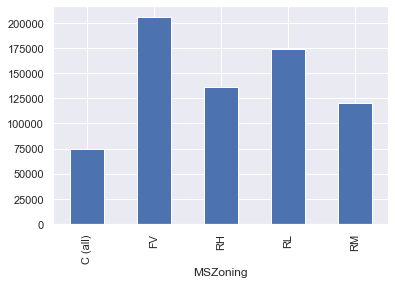

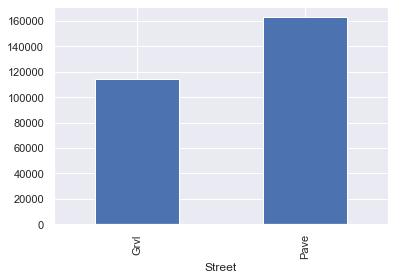

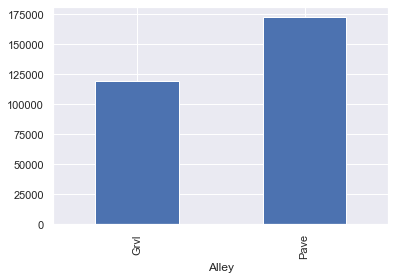

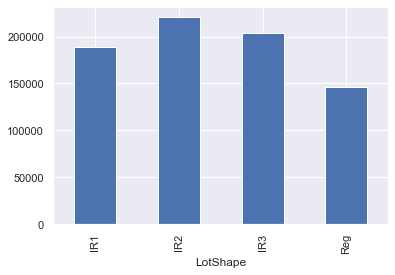

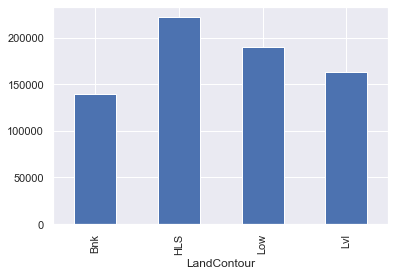

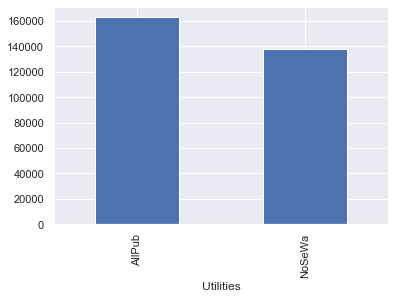

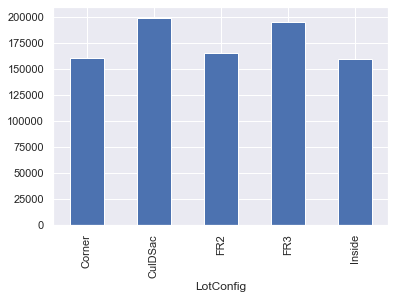

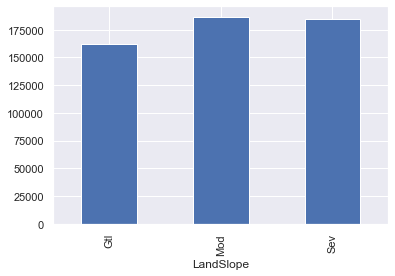

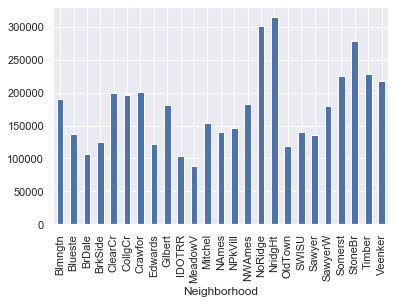

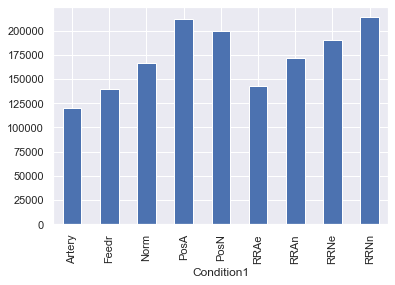

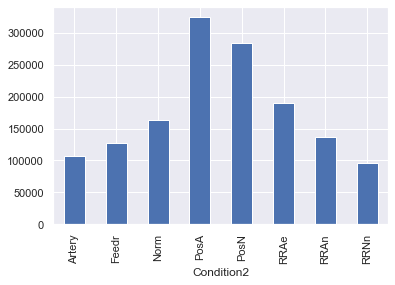

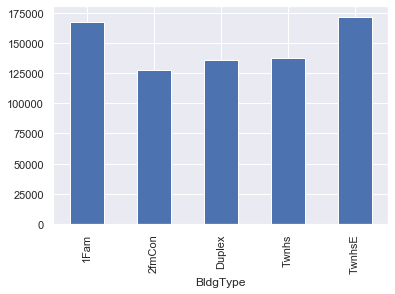

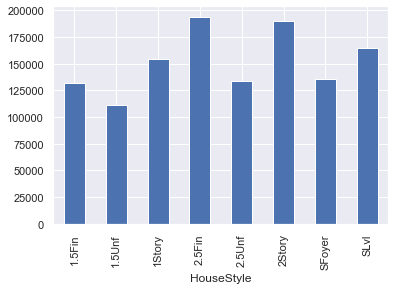

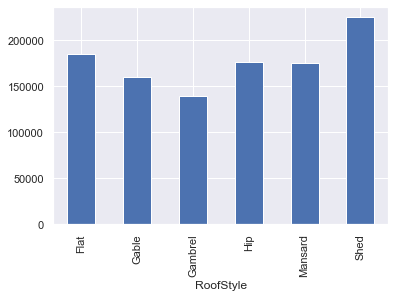

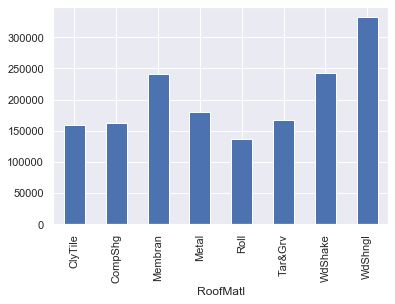

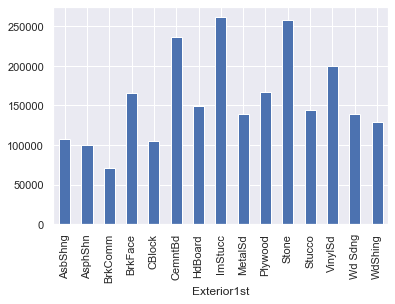

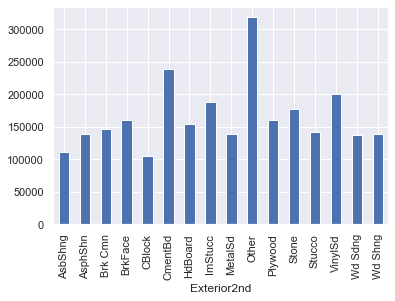

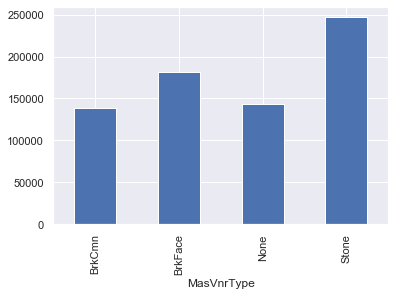

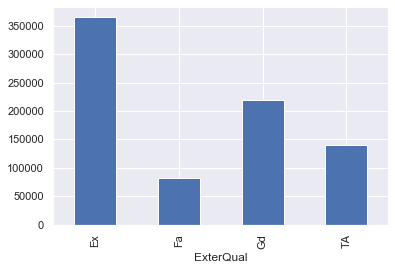

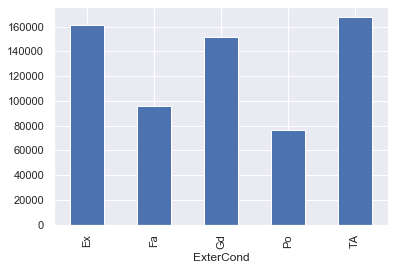

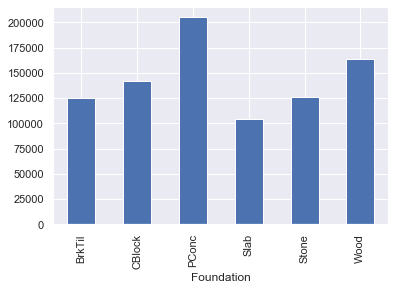

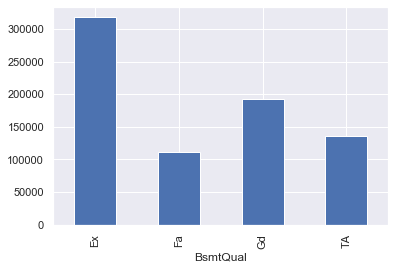

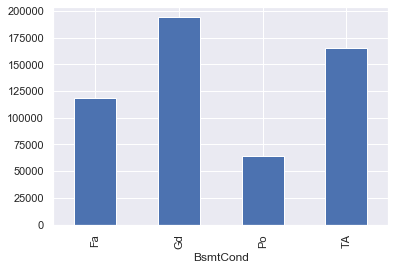

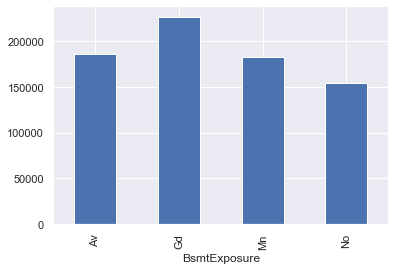

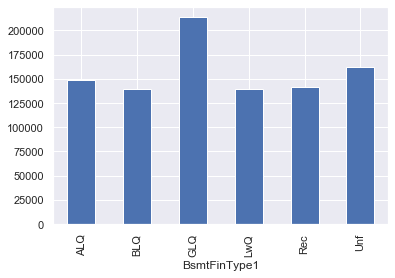

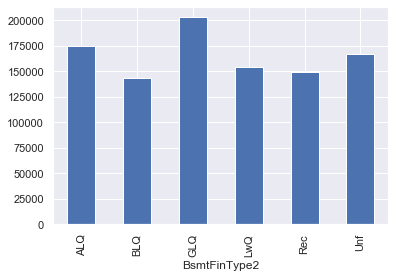

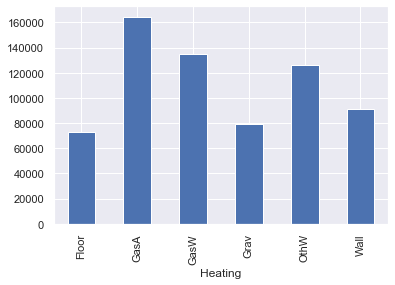

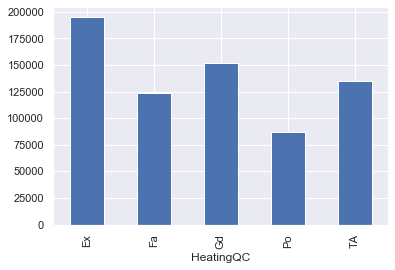

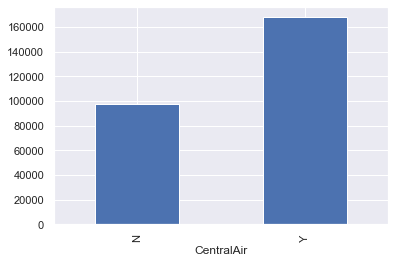

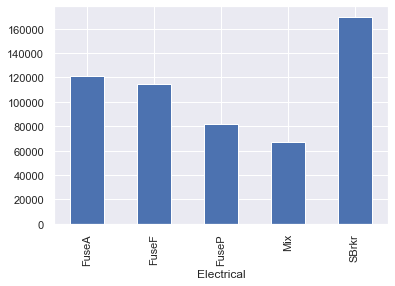

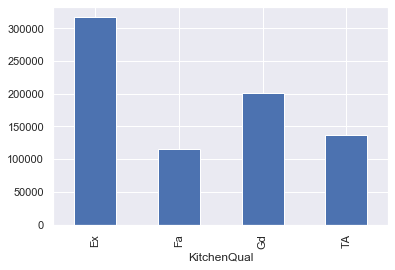

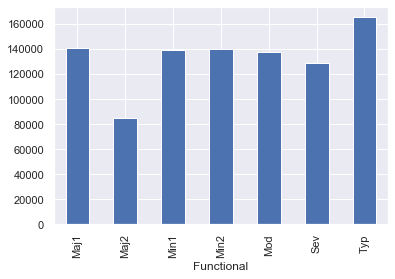

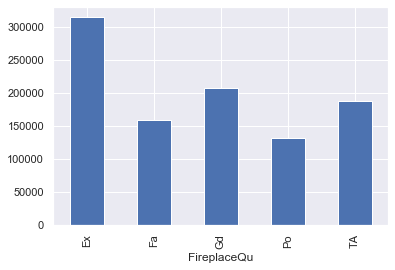

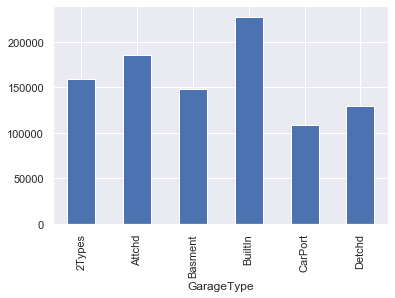

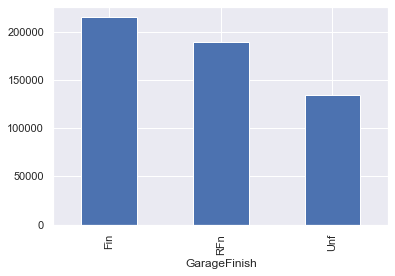

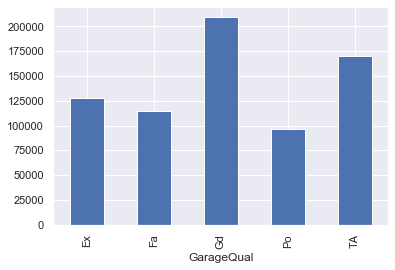

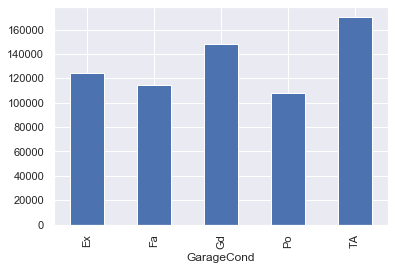

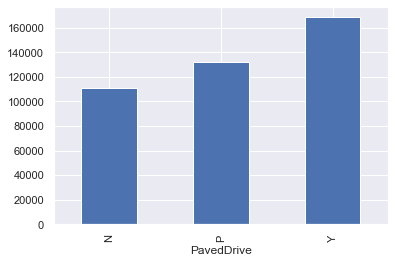

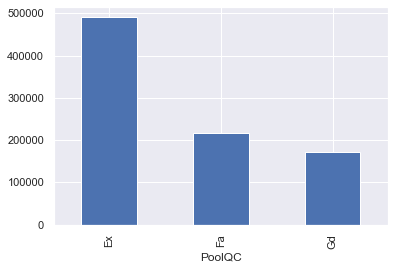

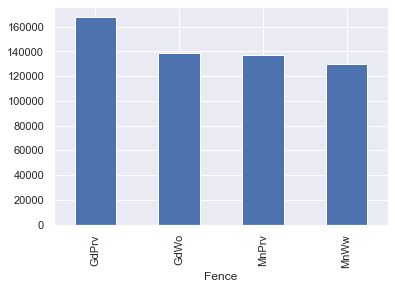

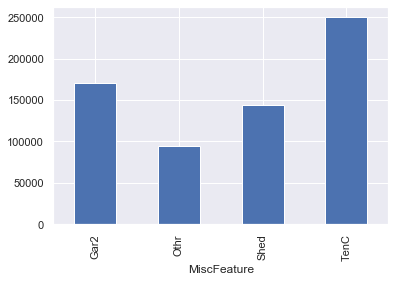

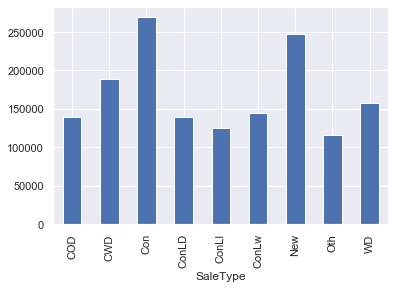

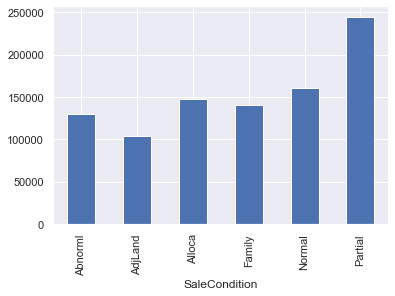

In [116]:
# let's see the behaviour of each categorical features with the sale price 

for feature in categorical_feature:
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot(kind = 'bar')
    plt.show()